# **Projeto Python Analythics - Análise de venda de jogos de video-game** 
Felipe Sanitá dos Santos

--> *A análise será realizada com base em dados sobre a venda global de jogos de vídeo game, onde serão apresentadas as quantidades vendidas globalmente (em milhões) e também dividas em 4 regiões(América do Norte, Europa, Japão e outras).*

--> *A tabela ainda conta com o rank de vendas, a plataforma, o ano, o gênero e a empresa publicadora do jogo.* 


A partir dos dados, as análises feitas serão:

*  **Quantidade de jogos por plataforma/gênero.**
*  **Quantidade de jogos lançados por ano.**
*  **Quais os gêneros mais vendidos?**
*  **Quais empresas que mais venderam jogos?** 
*  **Distribuição de vendas por região.**
*  **Apresentação das conclusões sobre os dados.**

*Parte das análises e comentários já serão apresentados abaixo dos gráficos plotados, e apenas algumas considerações serão colocadas ao final do projeto.*







# **COLETA DOS DADOS**

O dataset utilizado para realizar este trabalho foi retirado de kaggle: https://www.kaggle.com/datasets/kedokedokedo/vgsales

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
vgSales = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projeto Analytics/VgSales/vgsales.csv')
vgSales = vgSales.sort_values('Rank')
vgSales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
6112,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
122,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
8322,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
9750,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
705,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
3632,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
4406,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
9749,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
12441,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


# **PROCESSAMENTO DOS DADOS**

In [4]:
vgSales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16324 entries, 6112 to 4407
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16324 non-null  int64  
 1   Name          16324 non-null  object 
 2   Platform      16324 non-null  object 
 3   Year          16324 non-null  int64  
 4   Genre         16324 non-null  object 
 5   Publisher     16288 non-null  object 
 6   NA_Sales      16324 non-null  float64
 7   EU_Sales      16324 non-null  float64
 8   JP_Sales      16324 non-null  float64
 9   Other_Sales   16324 non-null  float64
 10  Global_Sales  16324 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


In [6]:
# Verificando os valores nulos

vgSales.loc[vgSales['Publisher'].isnull()]

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
7231,1664,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007,Misc,NaN,0.87,0.32,0.0,0.02,1.21
5271,2224,Bentley's Hackpack,GBA,2005,Misc,NaN,0.67,0.25,0.0,0.02,0.93
4569,3161,Nicktoons Collection: Game Boy Advance Video V...,GBA,2004,Misc,NaN,0.46,0.17,0.0,0.01,0.64
4570,3168,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004,Misc,NaN,0.46,0.17,0.0,0.01,0.64
4605,3768,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004,Misc,NaN,0.38,0.14,0.0,0.01,0.53
4653,4528,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004,Misc,NaN,0.31,0.11,0.0,0.01,0.43
4664,4637,The Fairly Odd Parents: Game Boy Advance Video...,GBA,2004,Misc,NaN,0.30,0.11,0.0,0.01,0.42
5471,5649,Cartoon Network Collection: Game Boy Advance V...,GBA,2005,Misc,NaN,0.23,0.08,0.0,0.01,0.32
4734,6439,Sonic X: Game Boy Advance Video Volume 1,GBA,2004,Misc,NaN,0.19,0.07,0.0,0.00,0.27
4741,6564,Dora the Explorer: Game Boy Advance Video Volu...,GBA,2004,Misc,NaN,0.18,0.07,0.0,0.00,0.26


In [7]:
### Substituindo os valores nulos por "Nintendo", pela plataforma ser GBA (Game Boy Advanced)

vgSales = vgSales.fillna("Nintendo")
vgSales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16324 entries, 6112 to 4407
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16324 non-null  int64  
 1   Name          16324 non-null  object 
 2   Platform      16324 non-null  object 
 3   Year          16324 non-null  int64  
 4   Genre         16324 non-null  object 
 5   Publisher     16324 non-null  object 
 6   NA_Sales      16324 non-null  float64
 7   EU_Sales      16324 non-null  float64
 8   JP_Sales      16324 non-null  float64
 9   Other_Sales   16324 non-null  float64
 10  Global_Sales  16324 non-null  float64
dtypes: float64(5), int64(2), object(4)
memory usage: 1.5+ MB


# **PLOTAGEM DOS GRÁFICOS E ANÁLISE DOS DADOS**

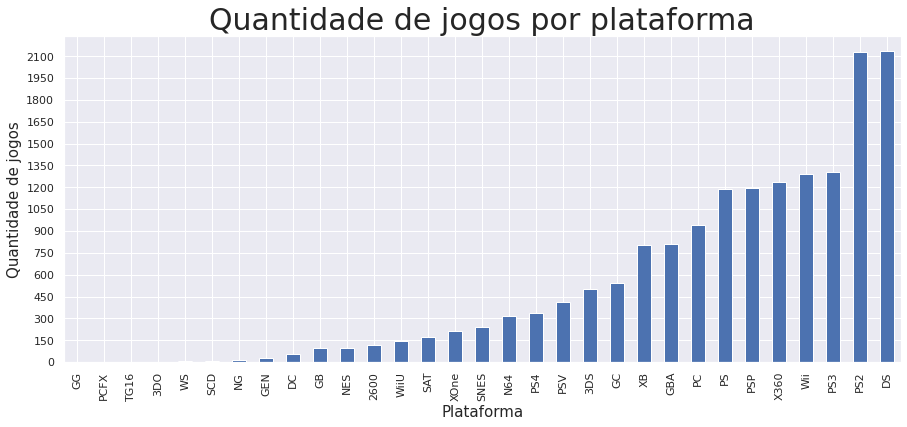

In [8]:
#Plotando a quantidade de jogos por plataforma de uma maneira ordenada

jogosP = vgSales.groupby('Platform').count().sort_values('Rank')
jogosP = jogosP['Rank']

fig = plt.figure(figsize=(15, 6))  
sns.set()
jogosP.plot(kind='bar')
plt.title('Quantidade de jogos por plataforma', fontsize=30)
plt.xlabel('Plataforma', fontsize=15)
plt.ylabel('Quantidade de jogos', fontsize=15)
plt.yticks(np.arange(0,2101,150))
plt.show()

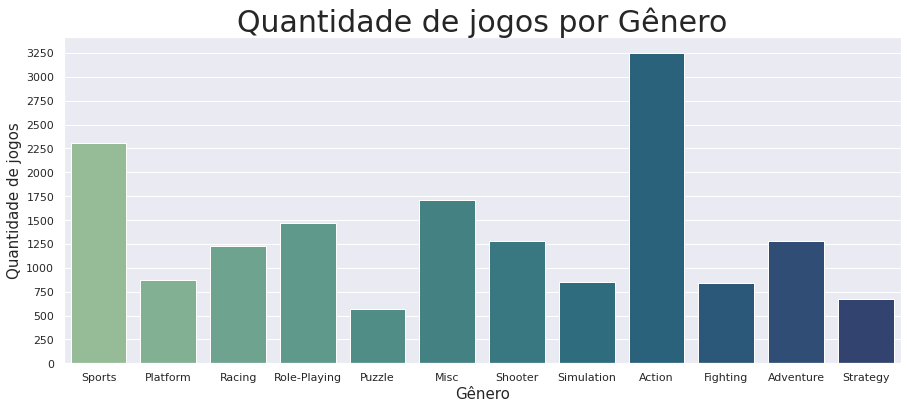

In [10]:
#### Quantidade de jogos por Genero

fig = plt.figure(figsize=(15, 6))  
sns.set()
sns.countplot(x=vgSales['Genre'], palette='crest')
plt.title('Quantidade de jogos por Gênero', fontsize=30)
plt.xlabel('Gênero', fontsize=15)
plt.ylabel('Quantidade de jogos', fontsize=15)
plt.yticks(np.arange(0,3500,250))
plt.show()

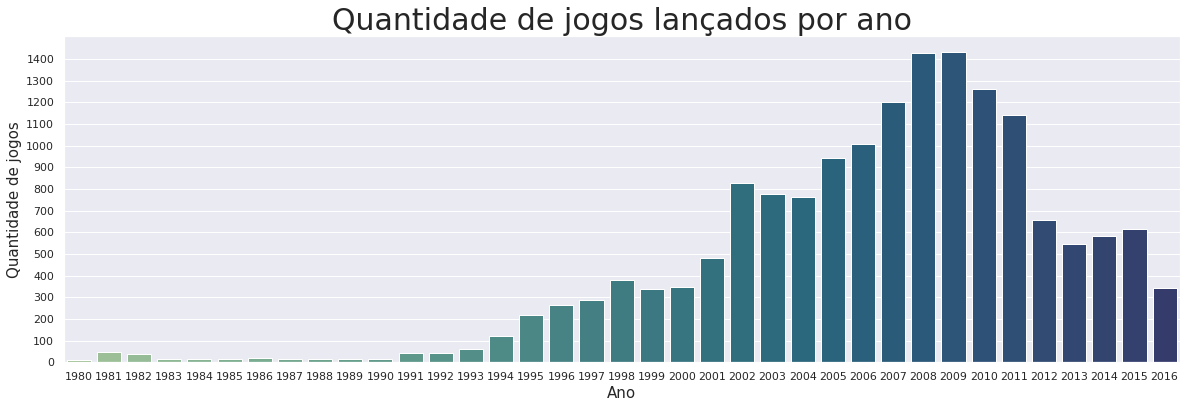

In [11]:
### Quantidade de jogos ao longo dos anos

fig = plt.figure(figsize=(20, 6))  
sns.set()
sns.countplot(x=vgSales['Year'],palette='crest')
plt.title('Quantidade de jogos lançados por ano', fontsize=30)
plt.xlabel('Ano', fontsize=15)
plt.ylabel('Quantidade de jogos', fontsize=15)
plt.yticks(np.arange(0,1500,100))
plt.show()

Pelo gráfico acima, podemos ver como a indústria dos jogos de video game cresceram após os anos 90, e principalmente após os anos 2000, onde novas tecnologias de resolução e processamento de jogos foram criadas. 

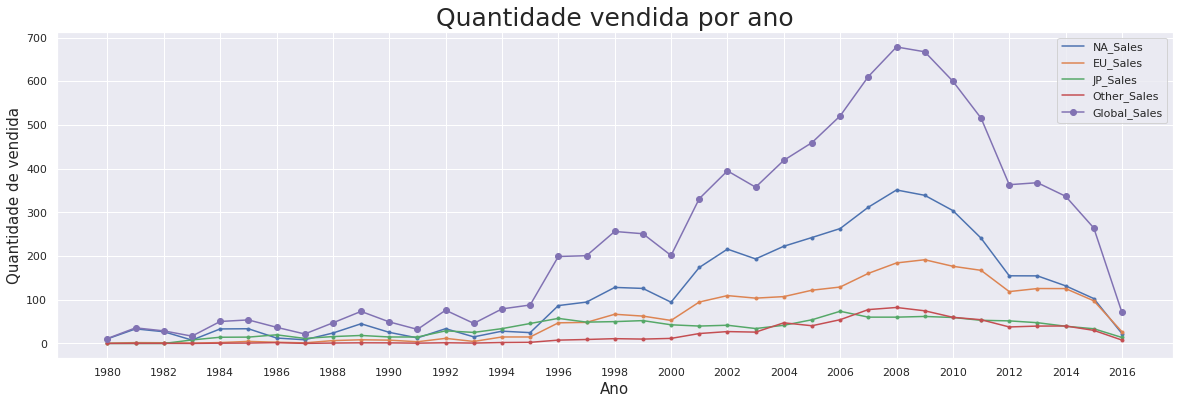

In [12]:
## Quantidade vendida por ano

fig = plt.figure(figsize=(20,6))
vgSales.groupby('Year')['NA_Sales'].sum().plot(kind='line',legend = True, marker ='.' )
vgSales.groupby('Year')['EU_Sales'].sum().plot(kind='line', legend = True, marker ='.')
vgSales.groupby('Year')['JP_Sales'].sum().plot(kind='line', legend = True, marker ='.')
vgSales.groupby('Year')['Other_Sales'].sum().plot(kind='line', legend = True, marker ='.')
vgSales.groupby('Year')['Global_Sales'].sum().plot(kind='line', legend = True, marker ='o')

plt.title('Quantidade vendida por ano', fontsize=25)
plt.xlabel('Ano',fontsize=15)
plt.ylabel('Quantidade de vendida', fontsize=15)
plt.xticks(np.arange(1980,2017,2))
sns.set()

plt.show()

A quantidade maior de jogos sendo desenvolvidos após os anos 200 impactou diretamente no crescimento do mercado com um aumento significativo nas vendas

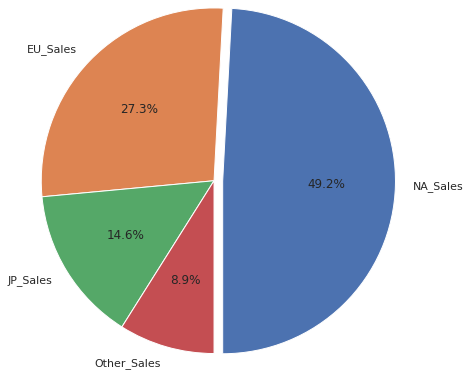

In [ ]:
## Distribuição de vendas globais por região

fig = plt.figure(figsize=(10, 4))  
ax = fig.add_axes([0,0,0.75,0.75])
vgSales[["NA_Sales", "EU_Sales","JP_Sales","Other_Sales"]].sum().plot(kind='pie', autopct="%1.1f%%", explode=(0.1,0,0,0), startangle=270, radius=2)
plt.show()

Entre os diferentes mercados, a américa do norte (especialmente os Estados Unidos) se manteve a frente dos outros mercados com uma margem significativa na participação de vendas de jogos

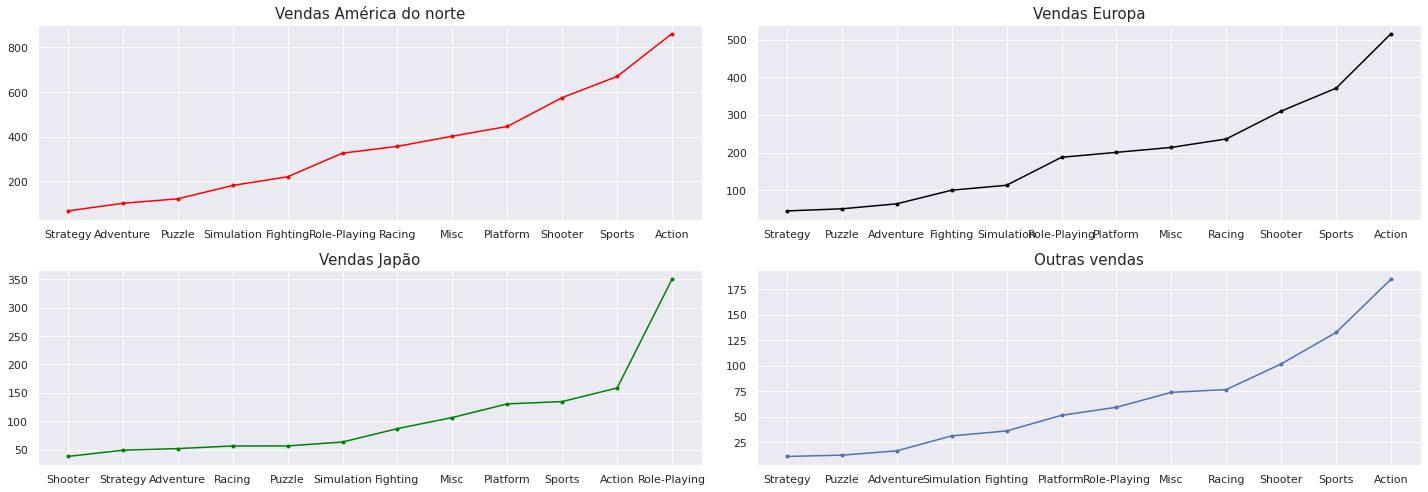

In [19]:
#### Quantidade vendida por Gênero em cada região


jp = vgSales.groupby('Genre')['JP_Sales'].sum().sort_values()
na = vgSales.groupby('Genre')['NA_Sales'].sum().sort_values()
other = vgSales.groupby('Genre')['Other_Sales'].sum().sort_values()
eu = vgSales.groupby('Genre')['EU_Sales'].sum().sort_values()


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(20, 7))

ax[0, 0].plot(na, marker='.', c='red')
ax[0, 0].set_title("Vendas América do norte", fontsize=15)

ax[0, 1].plot(eu, marker='.', c='black')
ax[0, 1].set_title("Vendas Europa", fontsize=15)

ax[1, 0].plot(jp, marker='.', c='green')
ax[1, 0].set_title("Vendas Japão", fontsize=15)

ax[1, 1].plot(other, marker='.')
ax[1, 1].set_title("Outras vendas", fontsize=15)


fig.tight_layout()
plt.show()

## Não consegui plotar esse gráfico no estilo gráfico de barras, de modo agrupado, apenas esse gráfico de linhas.


Analisando a distribuição de gêneros de jogos mais vendidos nos diferentes mercados, vemos que apenas o Japão possui um top3 diferente dos demais, sendo jogos do estilo 'Role-Playing' como os mais vendidos. 

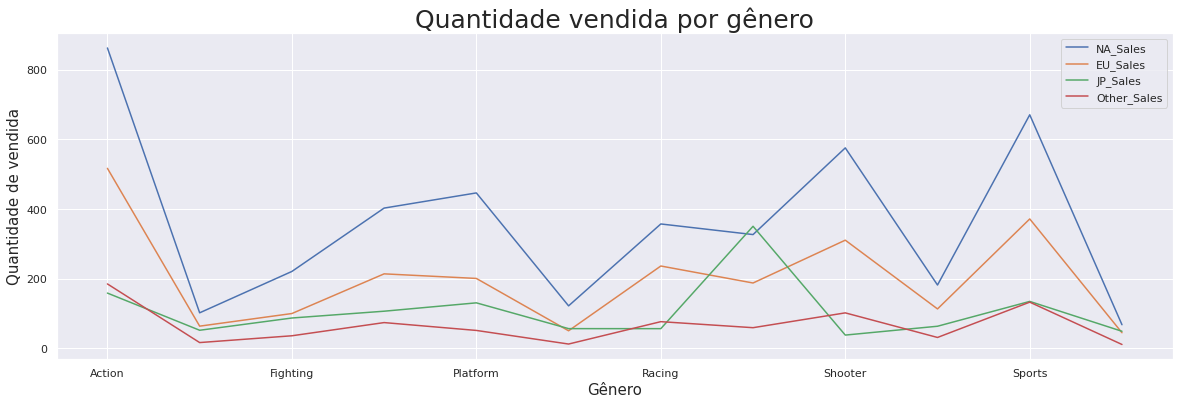

In [ ]:
## Quantidade vendida por Gênero

fig = plt.figure(figsize=(20,6))
vgSales.groupby('Genre')['NA_Sales'].sum().plot(kind='line',legend = True)
vgSales.groupby('Genre')['EU_Sales'].sum().plot(kind='line', legend = True)
vgSales.groupby('Genre')['JP_Sales'].sum().plot(kind='line', legend = True)
vgSales.groupby('Genre')['Other_Sales'].sum().plot(kind='line', legend = True)


plt.title('Quantidade vendida por gênero ', fontsize=25)
plt.xlabel('Gênero',fontsize=15)
plt.ylabel('Quantidade de vendida', fontsize=15)
sns.set()

### Não consegui colocar a lengenda do eixo X com todos os gêneros ###

plt.show()


Gráfico apenas para ilustrar a soma da quantidade vendida para todas as regiões

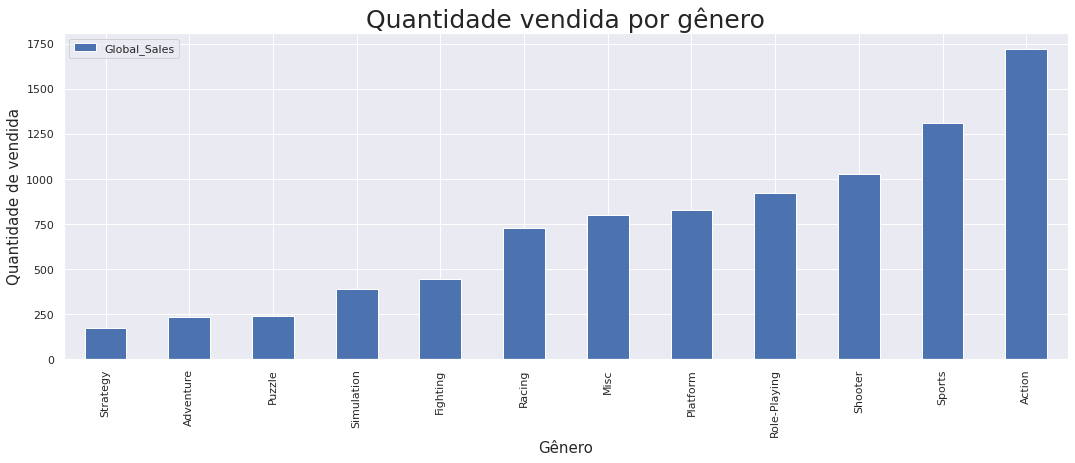

In [ ]:
#### Verificando qual genero mais vendeu 

fig = plt.figure(figsize=(18,6))
generos = vgSales.groupby('Genre')['Global_Sales'].sum().sort_values().plot(kind='bar', legend=True)
plt.title('Quantidade vendida por gênero', fontsize=25)
plt.xlabel('Gênero',fontsize=15)
plt.ylabel('Quantidade de vendida', fontsize=15)
sns.set()
plt.show()


Verificamos de de maneira geral, o top3 gêneros mais vendidos segue a ordem de vendas da Europa, América do Norte e outras regiões, ou seja, o mercado japonês não é tão significativo a ponto de mudar essa ordem de vendas globais, mesmo que o mais vendido lá seja 'Role-Playing'. 

Outro ponto relevante a se considerar é que o gênero 'Shooter' aparece no top3 de mais vendidos, porém não consta no top3 de quantidade de jogos produzido (top4).

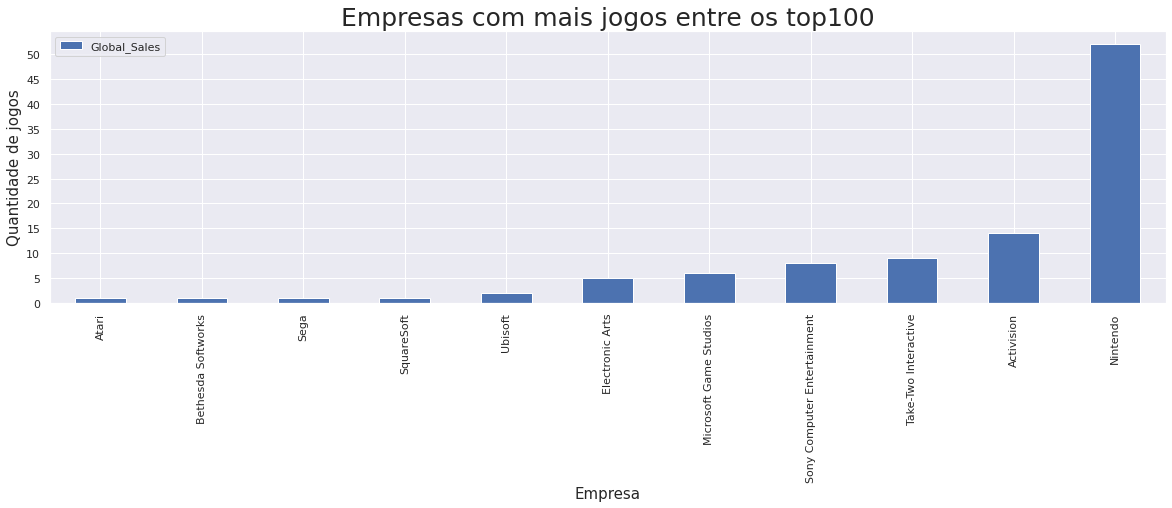

In [ ]:
# Verificando quais empresas possuem mais jogos entre os top100 mais vendidos

top100 = vgSales.loc[vgSales.Rank < 101]
top100 = top100.groupby('Publisher').count().sort_values(by=['Global_Sales'])

fig = plt.figure(figsize=(20,5))
top100= top100['Global_Sales'].plot(kind='bar', legend=True)

plt.title('Empresas com mais jogos entre os top100', fontsize=25)
plt.xlabel('Empresa',fontsize=15)
plt.ylabel('Quantidade de jogos', fontsize=15)
plt.yticks(np.arange(0,55,5))
plt.show()



Através dos dados, vemos que a Nintendo tem uma superioridade considerável em relação as outras publicadoras de jogos quando o assunto é quantidade vendida, isso porque os **15 primeiros jogos mais vendidos são todos da Nintendo**

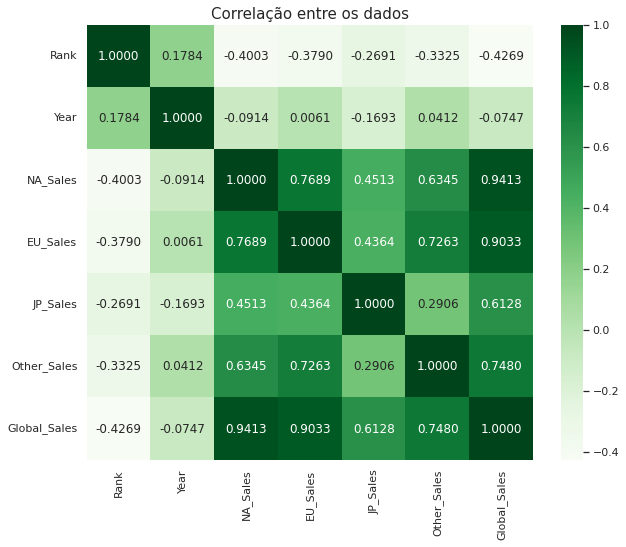

In [ ]:
### Correlação entre as variáveis da venda dos jogos

fig = plt.figure(figsize=(10, 8)) 
correlacao = vgSales.corr()
plt.title('Correlação entre os dados', fontsize=15)
sns.heatmap(correlacao, cmap='Greens', annot=True, fmt=".4f")
plt.show()

Através do gráfico de correlação, podemos ver o quanto o mercado da america do norte e da Europa é impactante para as vendas globais, tendo ambos uma correlação > 0.9

# **CONSIDERAÇÕES FINAIS**

**Os dados analisados apresentaram alguns pontos relevantes, tais como:**

1.  O Mercado norte americano é o principal consumidos de jogos de todo o mundo, com uma vantagem significativa entre as demais regiões.

2.  O estilo de jogo mais vendido é de ação, apesar do jogo mais vendido de ação ser GTA V, na 17° posição no ranking de mais vendidos. 

3.  A Nintendo tem vantagem ampla vantagem de vendas de jogos em relação as outras empresas.

4. Essa vantagem da Nintendo tem como um grande fator a alta venda de jogos do estilo Role-Playing no Japão, onde os jogos da série Pokémon lideram as vendas da Nintendo. 

